**About the dataset**

customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs. Using the above data companies can then outperform the competition by developing uniquely appealing products and services.
You are owing a supermarket mall and through membership cards, you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. You want to understand the customers like who are the target customers so that the sense can be given to marketing team and plan the strategy accordingly.

##### Importing the necessary libraries for this project


In [2]:
pip install scikit-learn-extra

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#libraries for clustering
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

#since we are dealing with kmeans we need to scale as distances have different units of measure
from sklearn.preprocessing import StandardScaler
#this score helps us in determining the the number of clusters to be used in the algorithim
from sklearn.metrics import silhouette_score

#filtering warnings to make the outputs appealing
import warnings
warnings.filterwarnings('ignore')

##### Reading in the dataset 

In [4]:
data = pd.read_csv('Mall_Customers.csv')

In [5]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


##### Data Preprocessing 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**Observations**
- The dataset has 200 rows and 5 columns
- There are no missing values in the dataset
- All variables are intergers except for the gender

In [8]:
data[data.isnull()].any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [9]:
data[data.duplicated()].any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

##### The data seems okay for analysis 

### EDA 

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


**Observations**
- The average age of mall customers is approximately 39 years with the minimum age being 18 and a max of 70.
- Averagely the customers income is 60(k) with a minimum income of 15(k) and max 137(k).
- Average spending score is 50 with a minimum spend of 1.0 and 99 as the max

Skew : 0.49
Age


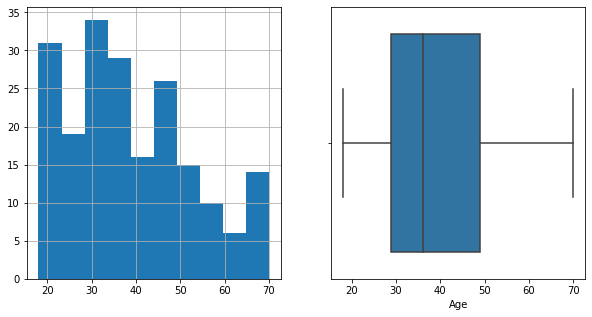

Skew : 0.32
Annual Income (k$)


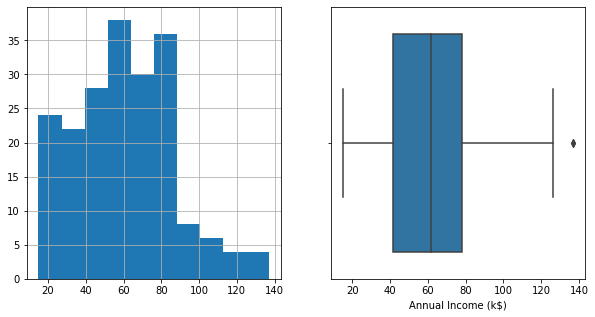

Skew : -0.05
Spending Score (1-100)


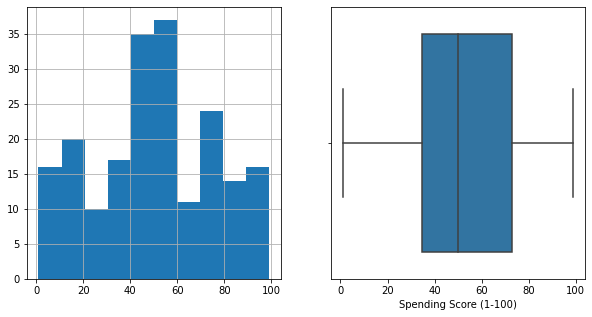

In [11]:
#here we try to plot and visualize how the data is ditributed we use histograms and boxplots
for col in data.columns[2:]:
    print('Skew :', round(data[col].skew(),2))
    print(col)
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    data[col].hist(bins=10)
    plt.subplot(1,2,2)
    sns.boxplot(data[col])
    plt.show()


**Observations**
-  Annual income contains a few outliers showing their are individuals who earn relatively higher
- The age variableis slightly skewed to the right showing there are also older people who visits the mall
- Spending score looks normally distributed, the spending score seems to lie between 40-60



<AxesSubplot:xlabel='Gender', ylabel='count'>

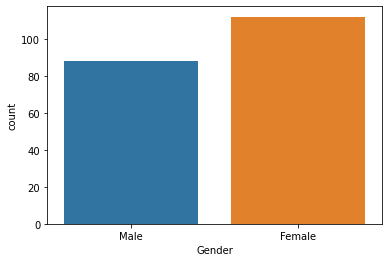

In [12]:
sns.countplot(x='Gender',data=data)

**Observation**
- From the plot there are more females customers than male customers who visits the mall

##### Univariete Analysis
###### Pie Chart 

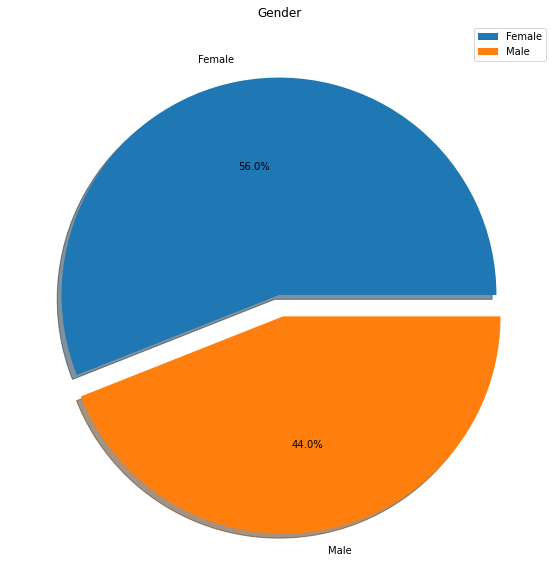

In [13]:
plt.figure(figsize=(10,10))
x=data['Gender'].value_counts()
explode=[0,0.1]
labels=['Female','Male']
plt.pie(x=x,labels=labels,explode=explode,autopct= '%.1f%%',shadow=True)
plt.legend()
plt.title('Gender')
plt.show()

**Observations**
- There are more Female customers who visits the store than male customers
- Female percentage is 56% and that for male is 44%

###### Violin plot


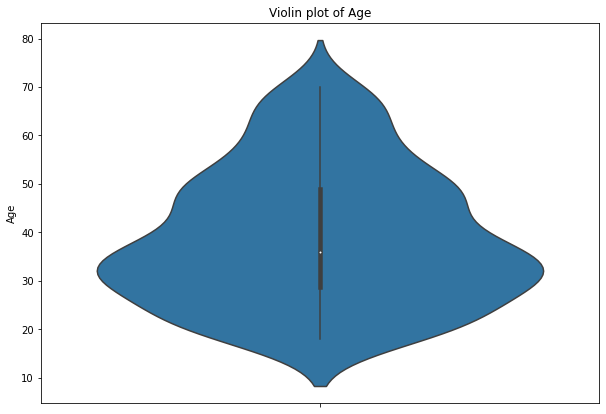

In [14]:
plt.figure(figsize=(10,7))
sns.violinplot(y=data['Age'])
plt.title('Violin plot of Age')
plt.show()

**Observations**
- Majority of the customers who visits the mall are between 30-35 of age

###### Count plot 


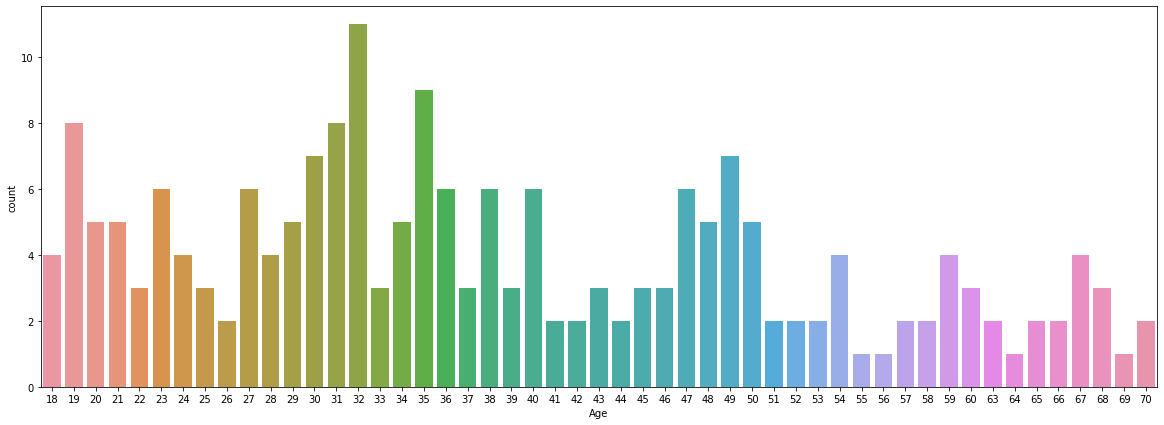

In [15]:
plt.figure(figsize=(20,7))
sns.countplot(data['Age'])
plt.show()

**Observations**
- Majority of the customers who visit the store range between the age of 30-35
- Customers of age 32 are more compared to the other age groups

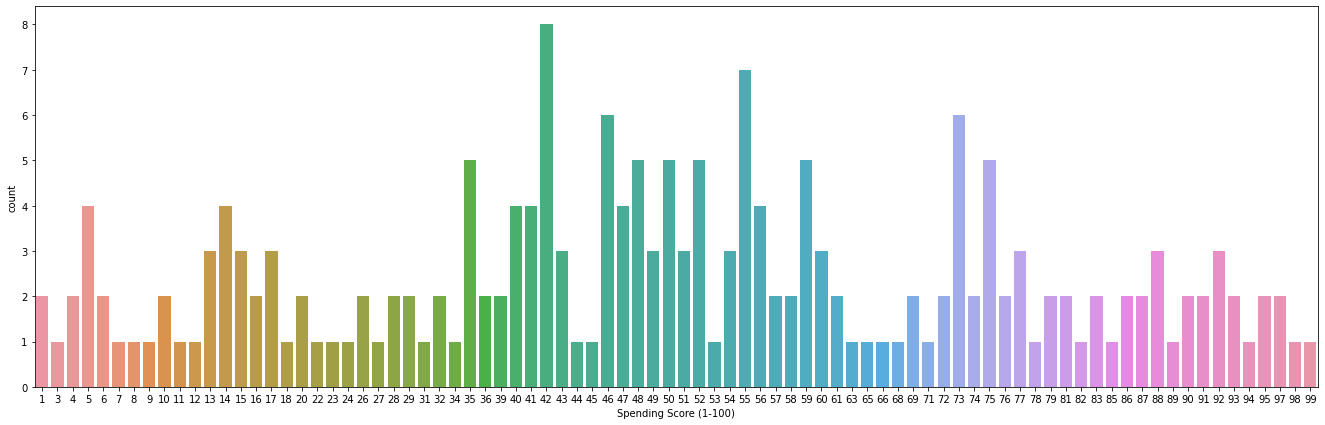

In [16]:
plt.figure(figsize=(23,7))
sns.countplot(data['Spending Score (1-100)'])
plt.show()

**Observations**
- Majority of customers have a spending score between 40 and 60

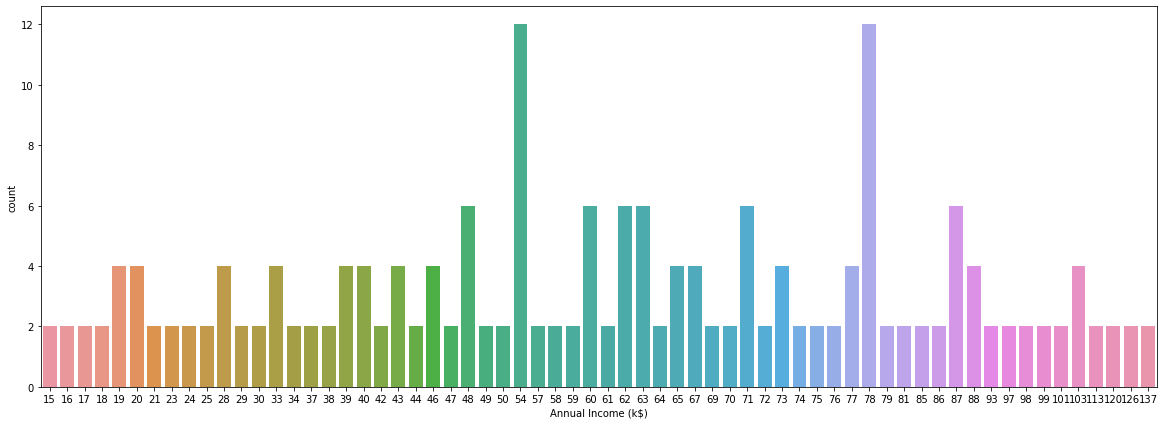

In [17]:
plt.figure(figsize=(20,7))
sns.countplot(data['Annual Income (k$)'])
plt.show()

**Observations**
- Majority of customers have annual income between 54 and 78 (k$)

In [18]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

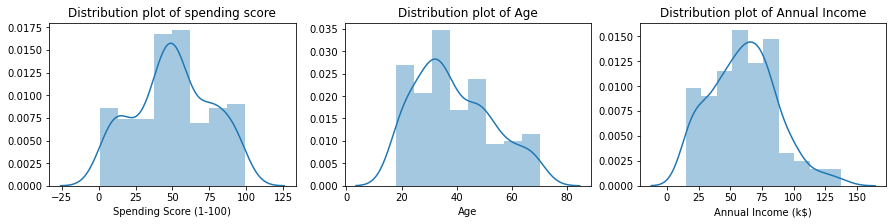

In [19]:
%matplotlib inline
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
sns.distplot(data['Spending Score (1-100)'])
plt.ylabel('')
plt.title('Distribution plot of spending score')
plt.subplot(1,3,2)
sns.distplot(data['Age'])
plt.title('Distribution plot of Age')
plt.ylabel('')
plt.subplot(1,3,3)
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution plot of Annual Income')
plt.ylabel('')
plt.show()

**Observations**
- Most of the customers spending score is between 40-60
- There are customers with wide variety of age
- Most customers Annual income ranges between 50-80

##### Boxplot

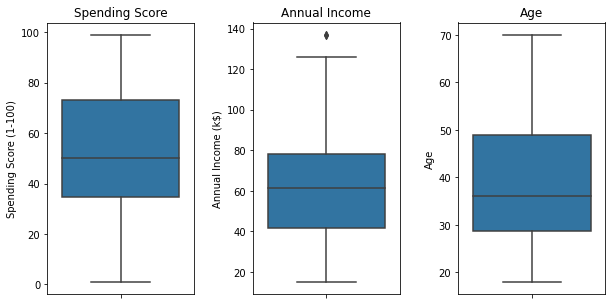

In [20]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.boxplot(y=data['Spending Score (1-100)'])
plt.title('Spending Score')

plt.subplot(1,3,2)
sns.boxplot(y=data['Annual Income (k$)'])
plt.title('Annual Income')

plt.subplot(1,3,3)
sns.boxplot(y=data['Age'])
plt.title('Age')
plt.subplots_adjust(wspace=0.4,hspace=0.4)
plt.show()


**Observations**
- There are no outliers in the data set

#### Bivariet Analysis 

###### Scatter plot 

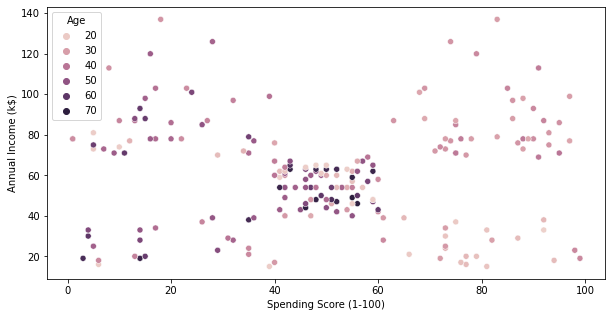

In [21]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Spending Score (1-100)', y = 'Annual Income (k$)',hue='Age', data=data)
plt.show()

- As seen from the scatterplot there seems to emrge clusters of customers, let us proceed and find this group of customers.

In [22]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Figure size 720x504 with 0 Axes>

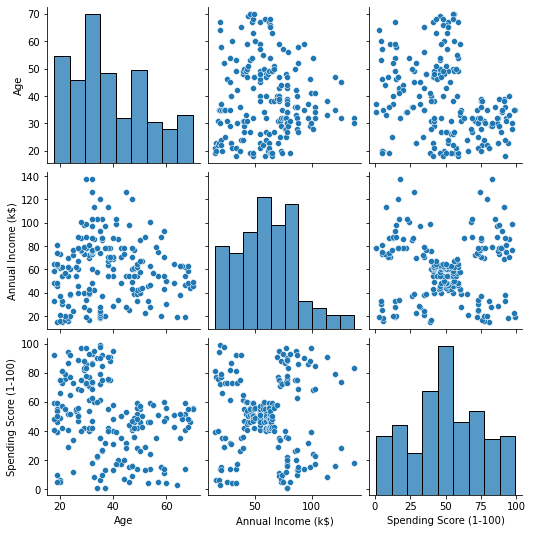

In [23]:
plt.figure(figsize=(10,7))
sns.pairplot(data.iloc[:,[2,3,4]])
plt.show()

**Observations**
- There seem to emerge groups of clusters but we are not sure how many they are especially between Annual Income and spending score

#### Correlation matrix 

In [24]:
#dropping some features as they wont help us in our analysis
Data = data.drop(['CustomerID','Gender','Age'],axis=1)

<AxesSubplot:>

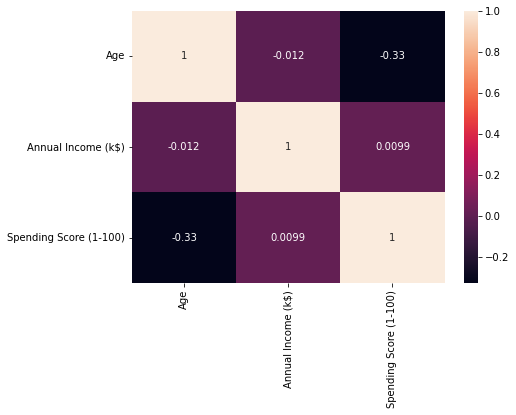

In [30]:
plt.figure(figsize=(7,5))
sns.heatmap(data.iloc[:,[2,3,4]].corr(),annot=True)

**Observations**
- There is a low positive correlation in the dataset between Spending score and Annual Income.
- Spending Score, Annual Income are negatively correlated with Age.

#### Lets start on building the model


In [31]:
#first we need to scale the dataset and in the process we convert it in to a dataframe
scaler = StandardScaler()
Data_scaled = pd.DataFrame(scaler.fit_transform(Data),columns=Data.columns)
Data_scaled.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [33]:
#we then create a copy of the scaled to store the labels for each algorithim
Data_scaled_copy = Data_scaled.copy()

##### Determining the required number of cluters


Text(0.5, 1.0, 'Elbow plot')

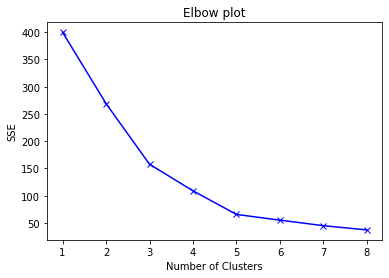

In [34]:
#create an empty dictionar for storing the output
sse={}
#we for loop between 1-8
for k in range(1,9):
    kmeans=KMeans(n_clusters=k,random_state=1).fit(Data_scaled_copy)
    sse[k] = kmeans.inertia_
    
#then we visualize
plt.plot(list(sse.keys()),list(sse.values()),'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow plot')

**Observation**
- There seems to emerge an elbow at K=5, we might choose this value or use a silhouette score to be precise


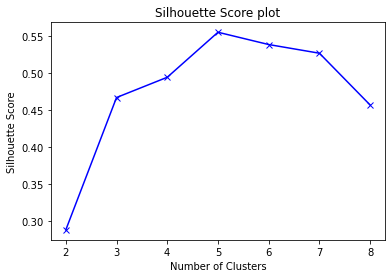

In [115]:
#lets try the silhouette score
sc = {}
#sc takes k from 2-8
for d in range (2,9):
    kmeans = KMeans(n_clusters=d,random_state=1).fit(Data_scaled_copy)
    #we find the labels for the each observations
    labels=kmeans.predict(Data_scaled_copy)
    sc[d]=silhouette_score(Data_scaled_copy,labels)
plt.plot(list(sc.keys()),list(sc.values()),'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score plot')
plt.show()

**Observations**
- The silhouette score is high at cluster 5.

## THE K-MEANS ALGORITHIM

In [116]:
kmeans=KMeans(n_clusters=5,random_state=1).fit(Data_scaled_copy)

In [117]:
#we then predict the labels and add them to the original data and the scaled datasets
Data_scaled['kmeans_labels'] = kmeans.predict(Data_scaled_copy)
data['kmeans_labels'] = kmeans.predict(Data_scaled_copy)
y_means=kmeans.predict(Data_scaled_copy)
print(Data_scaled)
data.head()


     Annual Income (k$)  Spending Score (1-100)  kmeans_labels
0             -1.738999               -0.434801              4
1             -1.738999                1.195704              0
2             -1.700830               -1.715913              4
3             -1.700830                1.040418              0
4             -1.662660               -0.395980              4
..                  ...                     ...            ...
195            2.268791                1.118061              3
196            2.497807               -0.861839              1
197            2.497807                0.923953              3
198            2.917671               -1.250054              1
199            2.917671                1.273347              3

[200 rows x 3 columns]


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeans_labels
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4


In [118]:
#let us count the number of the labels
data['kmeans_labels'].value_counts()

2    81
3    39
1    35
4    23
0    22
Name: kmeans_labels, dtype: int64

In [119]:
#just checking the number of rows and columns to know how the labels were assigned
data.shape

(200, 6)

In [120]:
#lets look deeper in to the individual groups to get insights
mean=data.iloc[:,2:].groupby('kmeans_labels').mean()
median=data.iloc[:,2:].groupby('kmeans_labels').median()
kmeans_df=pd.concat([mean,median],axis=0)
#kmeans_df.head()
kmeans_df.index=['g_0 mean','g_1 mean','g_2 mean','g_3 mean','g_4 mean','g_0 median','g_1 median','g_2 median','g_3 median','g_4 median']
kmeans_df.T

,g_0 mean,g_1 mean,g_2 mean,g_3 mean,g_4 mean,g_0 median,g_1 median,g_2 median,g_3 median,g_4 median
Age,25.272727,41.114286,42.716049,32.692308,45.217391,23.5,42.0,46.0,32.0,46.0
Annual Income (k$),25.727273,88.200000,55.296296,86.538462,26.304348,24.5,85.0,54.0,79.0,25.0
Spending Score (1-100),79.363636,17.114286,49.518519,82.128205,20.913043,77.0,16.0,50.0,83.0,17.0


**Observations**
- Cluster 4 is for customers who earn little amount of money and as a result they also spend less. This is a safe play as they dont over spend more than what they receive and looking at their age factor, these are the oldest customers who knows how to budget them selves. The shop/mall will be least intersted on such customers
- Cluster 3 customers earn quite well and ofcourse there spending habits proves the same with the highest spending score.Such customers may be encouraged to spend more by giving them exclusive offers after attaining a certain spending score.
-  Cluster 2 are average spenders as they also earn averagily. There isn't much about this group
- Cluster 1 receive an annual income that is high yet they spend very little. These group may be subjected to discounts or offers to persuade them to spend more.
- Cluster 0 is fo the customers who earn less but find them selves spending more. Such customers dont require any offers or discounts as they will a;ways find a way of spending, maybe they are over satisfied with the mall services.

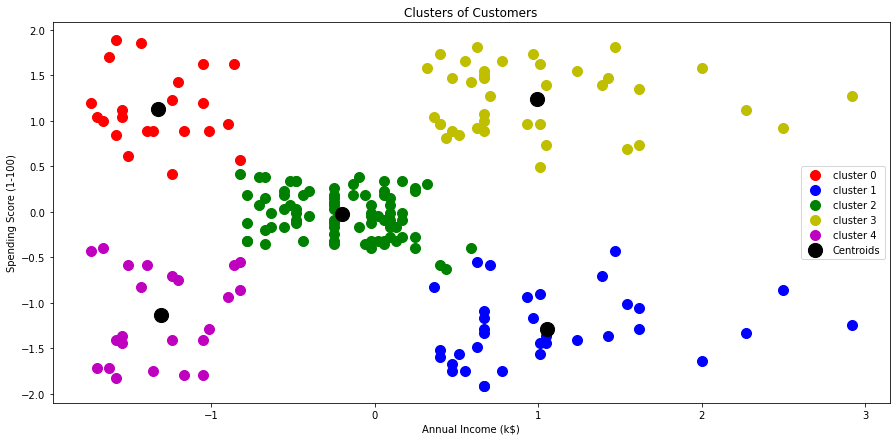

In [133]:
plt.figure(figsize=(15,7))

x=np.array(Data_scaled)
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s=100, c='r', label='cluster 0')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s=100, c='b', label='cluster 1')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s=100, c='g', label='cluster 2')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s=100, c='y', label='cluster 3')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s=100, c='m', label='cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**Observations**
- From the above plot we can see that the data has been grouped into 5 clusters

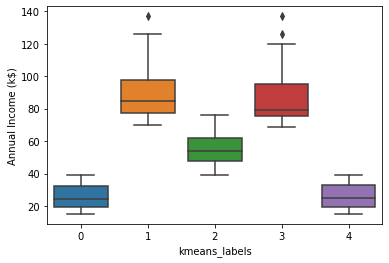

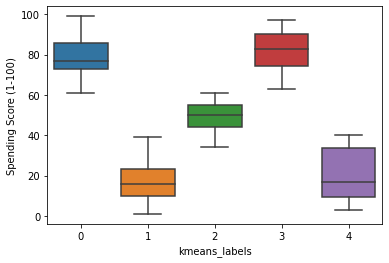

In [131]:
#visualizing boxplots of diffrent attributes of each cluster 
for col in data.columns[3:5]:
    sns.boxplot(x='kmeans_labels',y=col,data=data)
    plt.show()
    
